# Project Submission: Exploratory Data Analysis

Student names: Qi Cai, Alex Karadjov

Student pace: full time

Instructor name: David B. Elliott
    

## EDA on the positive and negative sentiment tweets for both Apple and Google.

In [1]:
# import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import natural language toolkit for preprocessing prior using wordcloud
import nltk
from nltk.tokenize import TweetTokenizer
import string
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# install wordcloud for text visualization
#!pip install wordcloud
#!pip install pillow
#!pip install --upgrade pillow
from wordcloud import WordCloud
import PIL # import pillow for image visualization
from PIL import Image, ImageDraw, ImageFont

In [2]:
# Import our cleaned dataset
df = pd.read_csv('./Data/Cleaned_tweet_dataset.csv')

Examine what are the most frequent words occur in 
1. Positive tweets for Apple products
2. Negative tweets for Apple products
3. Positive tweets for Google products
4. Negative tweets for Google products

## Task 1: Analyze positive tweets for Apple products

In [4]:
# Make a dataframes for Apple's positive tweets 
Apple_Positives = df [ (df['Brand'] == 'Apple') & (df['Emotion'] == 'Positive') ]
Apple_Positives

Unnamed: 0                                              Tweet  \
1              1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2              2  @swonderlin Can not wait for #iPad 2 also. The...   
7              8  Beautifully smart and simple idea RT @madebyma...   
8              9  Counting down the days to #sxsw plus strong Ca...   
13            14  Great #sxsw ipad app from @madebymany: http://...   
...          ...                                                ...   
8915        9072  @mention your iPhone 4 cases are Rad and Ready...   
8920        9077  @mention your PR guy just convinced me to swit...   
8922        9079  &quot;papyrus...sort of like the ipad&quot; - ...   
8928        9085  I've always used Camera+ for my iPhone b/c it ...   
8931        9088                      Ipad everywhere. #SXSW {link}   

           Brand/Product   Emotion  Brand  
1     iPad or iPhone App  Positive  Apple  
2                   iPad  Positive  Apple  
7     iPad or iPhone App  Positive  Apple  
8                  Apple  Positive  Apple  
13    iPad or iPhone App  Positive  Apple  
...                  ...       ...    ...  
8915              iPhone  Positive  Apple  
8920              iPhone  Positive  Apple  
8922                iPad  Positive  Apple  
8928  iPad or iPhone App  Positive  Apple  
8931                iPad  Positive  Apple  

[2128 rows x 5 columns]

In [5]:
#parsing tweets into a list
corpus_Apple_pos = Apple_Positives['Tweet'].to_list()
corpus_Apple_pos[:5]

["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB',
 'Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear',
 'Great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l']

NLP Preprocessing Steps/Methods:

1. tokenize
2. remove punctuations
3. lower case
4. remove stopwords
5. remove numbers if necessary
6. lemmatizing
7. vectorizing (CountVectorizer or TfidfVectorizer )

## Tokenization
We will use TweetTokenizer becuase of its built-in function of handling hashtags correctly. It keeps hashtags intact.

In [6]:
# write a function to tokenize tweets
def tokenize_tweets(corpus, preserve_case=False, strip_handles=True):
    """Function returns tokens based on a corpus passed in. The corpus will be broken 
    down into tokens based on TweetTokenizer from the nltk package.
    -------------------------------
    Arguments:
    corpus: the collection of words to be tokenized in a corpus format.
    preserve_case: whether to keep the upper case letters in the words as upper case
    stip_handles: whether to remove twitter handles"""
    
    tokenizer = TweetTokenizer(preserve_case=preserve_case, 
                               strip_handles=strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens

In [7]:
# tokenize Apple Positive tweets
tokens_apple_pos = tokenize_tweets(corpus_Apple_pos)

In [9]:
# Check out the top 20 common words
freq = FreqDist(tokens_apple_pos)
freq.most_common(20)

[(',', 2870),
 ('#sxsw', 2142),
 ('.', 1593),
 ('the', 1229),
 ('ipad', 1010),
 ('link', 911),
 ('{', 909),
 ('}', 909),
 ('!', 891),
 ('to', 847),
 ('at', 749),
 ('for', 743),
 ('apple', 705),
 ('rt', 663),
 ('a', 625),
 ('2', 543),
 ('store', 539),
 ('in', 514),
 ('of', 460),
 ('iphone', 450)]

After we tokenized, we need to remove punctuations and stopwords.

## Remove Stopwords and Punctuations

In [10]:
stop_lst = stopwords.words('english') # this is our base stop words list

In [11]:
stop_lst += list(string.punctuation) # remove punctuations
stop_lst += ['...','#sxsw', '’', '#sxswi', 'sxsw', "''", 'link','rt']  #add more stopwords to the list after testing it out

In [12]:
# write a function to remove stopwords and punctuations
def remove_stopwords(tokens, stop_list = stop_lst):
    
    #eliminating external links
    
    tokens_stopped = [word.encode('ascii','ignore').decode() 
                      for word in tokens 
                      if (word not in stop_list) & 
                      (word.startswith('http') == False)]
    

    return tokens_stopped

In [13]:
# Add a list of brand and product words to prevent they occur in the wordclouds
stop_lst_no_brands_products = stop_lst + ['ipad', 'apple', 'google', 'iphone', '#apple', 
                               '#google', '#ipad', '#iphone', 'android']

In [14]:
# Remove stopwords and punctuations from the tokenzied list
tokens_apple_pos_nostopwords = remove_stopwords(tokens_apple_pos, stop_lst_no_brands_products)

Take a look at 40 most common words in the Apple positive sentiment tweets with no stopwords

In [15]:
freq = FreqDist(tokens_apple_pos_nostopwords)

In [16]:
freq.most_common(40)

[('2', 544),
 ('store', 539),
 ('app', 310),
 ('', 297),
 ('austin', 228),
 ('new', 218),
 ('pop-up', 151),
 ('#ipad2', 129),
 ('line', 124),
 ('get', 120),
 ('via', 103),
 ('one', 98),
 ("i'm", 97),
 ('cool', 96),
 ('temporary', 89),
 ('opening', 87),
 ('downtown', 86),
 ('free', 85),
 ('like', 81),
 ('go', 79),
 ('launch', 78),
 ('time', 78),
 ('great', 77),
 ('popup', 76),
 ('day', 73),
 ('love', 71),
 ('awesome', 70),
 ('even', 66),
 ('open', 65),
 ('got', 65),
 ('apps', 64),
 ('w', 63),
 ('pop', 58),
 ('good', 56),
 ('first', 54),
 ('wins', 53),
 ('check', 52),
 ('want', 52),
 ('going', 51),
 ('video', 50)]

## Lemmatization

Next, we still want to lemmatize the bag of words

In [17]:
# Write a function to lemmatize tokens
def lemmatization(tokens_list):
    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(token) for token in tokens_list]
    return tokens_lemm

In [18]:
# lemmatize the list
tokens_apple_pos_nostopwords_lemm = lemmatization(tokens_apple_pos_nostopwords)

In [19]:
# Take a look at the top 60 most common words
freq = FreqDist(tokens_apple_pos_nostopwords_lemm)
freq.most_common(60)

[('2', 565),
 ('store', 551),
 ('app', 310),
 ('', 297),
 ('austin', 228),
 ('new', 218),
 ('pop-up', 151),
 ('get', 139),
 ('line', 135),
 ('#ipad2', 129),
 ('via', 103),
 ('win', 101),
 ('one', 101),
 ("i'm", 97),
 ('cool', 96),
 ('go', 90),
 ('temporary', 89),
 ('day', 88),
 ('opening', 87),
 ('downtown', 86),
 ('launch', 86),
 ('free', 85),
 ('like', 81),
 ('time', 81),
 ('open', 80),
 ('come', 79),
 ('great', 77),
 ('popup', 76),
 ('love', 72),
 ('awesome', 70),
 ('even', 66),
 ('got', 65),
 ('apps', 64),
 ('w', 63),
 ('pop', 58),
 ('need', 56),
 ('good', 56),
 ('case', 55),
 ('want', 55),
 ('first', 54),
 ('check', 52),
 ('shop', 52),
 ('going', 51),
 ('video', 51),
 ('u', 49),
 ('set', 49),
 ('people', 48),
 ('today', 48),
 ('make', 46),
 ('begin', 46),
 ('ever', 46),
 ('thanks', 44),
 ('know', 43),
 ('smart', 43),
 ('heard', 43),
 ('next', 43),
 ('conference', 43),
 ('nice', 42),
 ('see', 42),
 (':)', 41)]

Conclusion for Apple products with positive sentiment tweets: store, app, austin, pop-out, #ipad2, cool, good, love, awesome, positive words like that in the first 60 most frequent words. Also 'free' is mentioned 85 times, there might be some free products that made the customers happy. 
    

## Use WordCloud to visualize most frequent texts in Apple's positive tweets

In [20]:
# Write a function for wordcloud generation
def generate_wordcloud(tokens, collocations=False, background_color='white', 
                       colormap='Blues', display=True):
    
    """Function generates and returns a wordcloud based on a tokens list passed in.
    -------------------------------
    Arguments:
    tokens: a tokens list
    collocations: Whether to include collocations (bigrams) of two words
    background_color: background color of the resulting word cloud
    colormap: the color map for the words that will be in the word cloud
    display: Whether to show the resulting wordcloud"""
    
    ## Initalize a WordCloud
    wordcloud = WordCloud(collocations=collocations,
                          background_color=background_color, 
                          colormap=colormap, 
                          width=500, height=300)

    ## Generate wordcloud from tokens
    wordcloud.generate(','.join(tokens))

    ## Plot with matplotlib
    if display:
        plt.figure(figsize = (12, 15), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis('off');
    return wordcloud

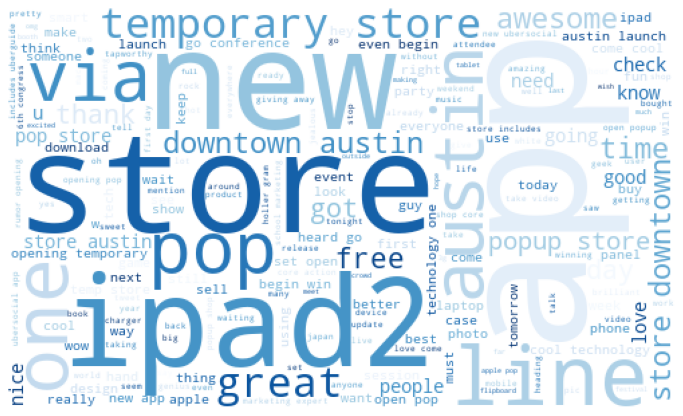

In [23]:
# Use wordcloud to visualize Apple' positive tweets most frequent words
wordcloud_apple_pos = generate_wordcloud(tokens_apple_pos_nostopwords_lemm, collocations = True)

### This wordcloud visualization tells us that for Apple products, positive tweets mostly talk about the iPad2, iphone, iphone app, apple store, maybe something amazing about the new apple store in downtown Austin. 'Free' is also mentioned, so there might be free products were received by the customers.

## Task 2: Analyze negative tweets for Apple products. Same process as for the positive tweets.

In [24]:
# Create its own dataframe
Apple_Negatives = df [ (df['Brand'] == 'Apple') & (df['Emotion'] == 'Negative') ]
Apple_Negatives.head()

Unnamed: 0                                              Tweet  \
0            0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
3            3  @sxsw I hope this year's festival isn't as cra...   
16          17  I just noticed DST is coming this weekend. How...   
63          64  Again? RT @mention Line at the Apple store is ...   
66          67  attending @mention iPad design headaches #sxsw...   

         Brand/Product   Emotion  Brand  
0               iPhone  Negative  Apple  
3   iPad or iPhone App  Negative  Apple  
16              iPhone  Negative  Apple  
63               apple  Negative  Apple  
66                iPad  Negative  Apple

In [25]:
#parsing tweets into a list
corpus_Apple_neg = Apple_Negatives['Tweet'].to_list()
corpus_Apple_neg[:5]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 'Again? RT @mention Line at the Apple store is insane.. #sxsw',
 'attending @mention iPad design headaches #sxsw {link}']

In [30]:
#Tokenize
tokens_apple_neg = tokenize_tweets(corpus_Apple_neg)
#Remove stop words and punctuations
tokens_apple_neg_nostopwords = remove_stopwords(tokens_apple_neg, stop_lst_no_brands_products)
#Lemmitizing 
tokens_apple_neg_nostopwords_lemm = lemmatization(tokens_apple_neg_nostopwords)

In [31]:
# Check on the 60 most common words
freq = FreqDist(tokens_apple_neg_nostopwords_lemm)
freq.most_common(60)

[('2', 79),
 ('app', 52),
 ('store', 47),
 ('', 40),
 ('like', 36),
 ('design', 29),
 ('people', 24),
 ('austin', 23),
 ('need', 22),
 ('new', 22),
 ('apps', 21),
 ('line', 20),
 ('one', 20),
 ('think', 18),
 ('get', 18),
 ('look', 18),
 ('headache', 17),
 ('news', 17),
 ('would', 17),
 ('time', 17),
 ('day', 17),
 ('battery', 16),
 ('say', 15),
 ('america', 15),
 ("i've", 14),
 ('go', 14),
 ('thing', 14),
 ('long', 14),
 ('fascist', 14),
 ('company', 14),
 ("i'm", 13),
 ('money', 13),
 ('pop-up', 13),
 ('phone', 13),
 ('fast', 12),
 ('back', 12),
 ('good', 12),
 ('#tapworthy', 12),
 ('take', 12),
 ('see', 12),
 ('going', 11),
 ('via', 11),
 ('talk', 11),
 ('come', 10),
 ('hate', 10),
 ('want', 10),
 ('heard', 10),
 ('best', 10),
 ('gave', 10),
 ('nothing', 10),
 ('w', 10),
 ('fade', 10),
 ('every', 10),
 ('button', 10),
 ('many', 9),
 ('user', 9),
 ('year', 9),
 ('know', 9),
 ('already', 9),
 ('1', 9)]

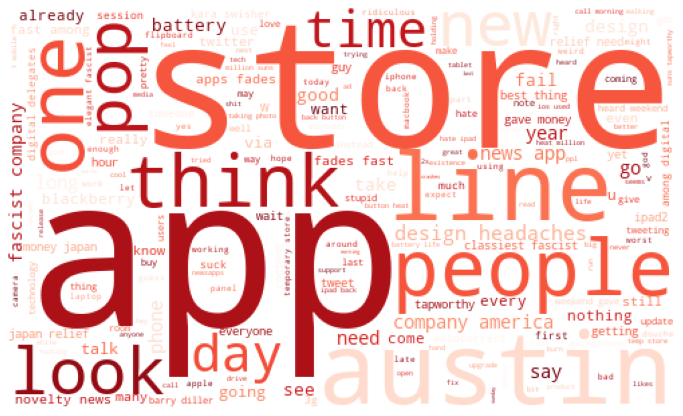

In [34]:
# Visualize the most frequent words from the Apple's negative tweets
wordcloud_apple_neg = generate_wordcloud(tokens_apple_neg_nostopwords_lemm, colormap='Reds', collocations = True)

In [35]:
freq = FreqDist(tokens_apple_neg_nostopwords_lemm)
freq.most_common(60)

[('2', 75),
 ('app', 52),
 ('store', 46),
 ('', 40),
 ('like', 32),
 ('design', 29),
 ('people', 24),
 ('austin', 23),
 ('new', 22),
 ('apps', 21),
 ('one', 20),
 ('need', 19),
 ('headaches', 17),
 ('news', 17),
 ('get', 17),
 ('would', 17),
 ('line', 16),
 ('battery', 15),
 ('america', 15),
 ("i've", 14),
 ('go', 14),
 ('long', 14),
 ('think', 14),
 ('fascist', 14),
 ('company', 14),
 ("i'm", 13),
 ('money', 13),
 ('pop-up', 13),
 ('time', 13),
 ('fast', 12),
 ('back', 12),
 ('day', 12),
 ('good', 12),
 ('#tapworthy', 12),
 ('see', 12),
 ('going', 11),
 ('thing', 11),
 ('via', 11),
 ('says', 11),
 ('take', 11),
 ('hate', 10),
 ('heard', 10),
 ('best', 10),
 ('gave', 10),
 ('nothing', 10),
 ('w', 10),
 ('fades', 10),
 ('every', 10),
 ('many', 9),
 ('users', 9),
 ('come', 9),
 ('already', 9),
 ('1', 9),
 ('still', 9),
 ('blackberry', 9),
 ('even', 9),
 ("can't", 9),
 ('#japan', 9),
 ('really', 9),
 ('phone', 9)]

### Now, take away brand and product names, negative tweets about Apple talked mostly about the app, store, people, also there iphone battery issue, something about line/ long line at the app store in Austin, something about Apple is a fascist company (mentioned 14 times), something about the design is bad, fail, fades, hate, headaches, these negative words are in the negative tweets for Apple. Blackberry is also mentioned. People might be comparing iphone with blackberry phones (mentioned 9 times).


Let's Compare Apple's positive tweets and negative tweets with WordCloud side by side.

In [36]:
def compare_wordclouds(wc1, wc2):
    """Function plots two wordclouds side-by-side for easy comparison
    -------------------------------
    Arguments:
    wc1: first wordcloud to be plotted
    wc2: second wordcloud to be plotted"""
    fig, ax = plt.subplots(figsize=(30,20), ncols=2)
    ax[0].imshow(wc1)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].imshow(wc2)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.tight_layout();

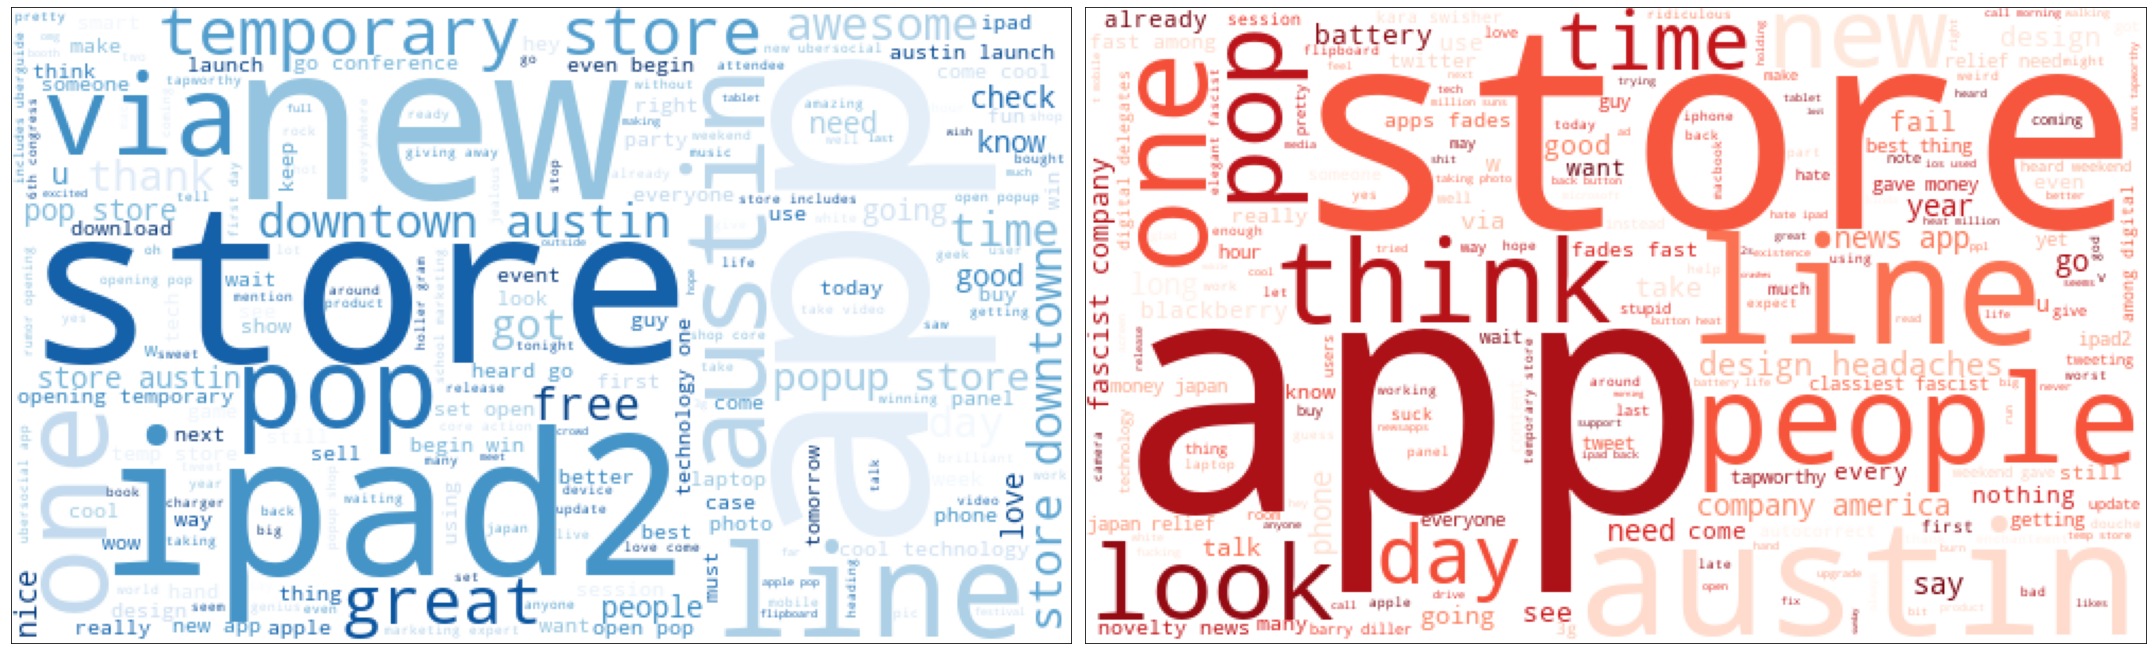

In [37]:
compare_wordclouds(wordcloud_apple_pos, wordcloud_apple_neg)

### Looks like App, store, austin show up most frequently in both positive and negative tweets. We might want to further investigate if there was a new store opened in downtwon Austin for during the time when iPad 2 was launched.

### Positive tweets might be about the new app store opened in downtown Austin, and people were excited about it and iPad2. Free products seem to make customers happy. 

### Negative tweets might be about iPhone battery issue, people also talked about Apple being a fascist company, something about the design is bad, fail, fades, hate, headaches,and more negative words.Blackberry phone is also mentioned.



## Task 3: Analyze positive tweets for Google products.

In [38]:
# Create its own dataframe
Google_Positives = df [ (df['Brand'] == 'Google') & (df['Emotion'] == 'Positive') ]
Google_Positives.head()

Unnamed: 0                                              Tweet  \
4            4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
6            7  #SXSW is just starting, #CTIA is around the co...   
9           10  Excited to meet the @samsungmobileus at #sxsw ...   
10          11  Find &amp; Start Impromptu Parties at #SXSW Wi...   
11          12  Foursquare ups the game, just in time for #SXS...   

   Brand/Product   Emotion   Brand  
4         Google  Positive  Google  
6        Android  Positive  Google  
9        Android  Positive  Google  
10   Android App  Positive  Google  
11   Android App  Positive  Google

In [39]:
#parsing tweets into a list
corpus_Google_pos = Google_Positives['Tweet'].to_list()

In [40]:
#Tokenize
tokens_google_pos = tokenize_tweets(corpus_Google_pos)
#Remove stop words and punctuations
tokens_google_pos_nostopwords = remove_stopwords(tokens_google_pos, stop_lst_no_brands_products)
#Lemmitizing 
tokens_google_pos_nostopwords_lemm = lemmatization(tokens_google_pos_nostopwords)

Check out 60 most common words in positive Google tweets 

In [41]:
freq = FreqDist(tokens_google_pos_nostopwords_lemm)
freq.most_common(60)

[('', 146),
 ('new', 139),
 ('party', 111),
 ('map', 109),
 ('circle', 107),
 ('social', 103),
 ('launch', 87),
 ('network', 84),
 ('mobile', 75),
 ('app', 72),
 ('mayer', 67),
 ('today', 63),
 ('marissa', 61),
 ('called', 60),
 ('great', 59),
 ('time', 56),
 ("google's", 56),
 ('major', 54),
 ('user', 44),
 ('get', 42),
 ('w', 41),
 ('possibly', 41),
 ('#android', 39),
 ('search', 39),
 ('day', 37),
 ('good', 36),
 ('people', 34),
 ('team', 33),
 ('see', 33),
 ('around', 32),
 ('like', 32),
 ('2', 31),
 ('free', 30),
 ('via', 29),
 ('big', 29),
 ('year', 29),
 ('fun', 28),
 ('best', 27),
 ('u', 27),
 ('route', 27),
 ('thanks', 26),
 ('traffic', 26),
 ('think', 25),
 ('come', 24),
 ('check', 24),
 ('world', 24),
 ('awesome', 23),
 ('cool', 23),
 ('austin', 23),
 ('work', 22),
 ('love', 21),
 ('panel', 21),
 ('using', 21),
 ('use', 20),
 ('product', 20),
 ('phone', 20),
 ('future', 19),
 ('place', 19),
 (':)', 19),
 ('look', 19)]

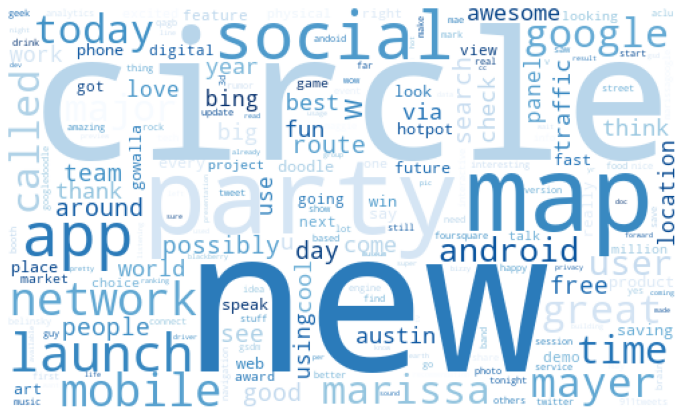

In [43]:
#Visualize with WordCloud
wordcloud_google_pos = generate_wordcloud(tokens_google_pos_nostopwords_lemm)

### For Google positive tweets, words are mentioned frequently are map, circle, party, launch, social network, new, mobile, Marrissa mayer... Google might hosted some social networking party for their most recent product. Austin again being mentioned here, same as Apple. People also enjoy free products from Google.

## Task 4:  Analyze negative tweets for Google products.

In [44]:
# Create its own dataframe
Google_Negatives = df [ (df['Brand'] == 'Google') & (df['Emotion'] == 'Negative') ]
Google_Negatives.head()

Unnamed: 0                                              Tweet  \
37           38  @mention  - False Alarm: Google Circles Not Co...   
67           68  Boooo! RT @mention Flipboard is developing an ...   
345         350  they took away the lego pit but replaced it wi...   
367         373  Google vs Bing on #bettersearch. Bing has a sh...   
558         567  Length of Google penalty based on severity of ...   

    Brand/Product   Emotion   Brand  
37         Google  Negative  Google  
67        android  Negative  Google  
345       Android  Negative  Google  
367        Google  Negative  Google  
558        google  Negative  Google

In [45]:
#parsing tweets into a list
corpus_Google_neg = Google_Negatives['Tweet'].to_list()

In [46]:
#Tokenize
tokens_google_neg = tokenize_tweets(corpus_Google_neg)
#Remove stop words and punctuations
tokens_google_neg_nostopwords = remove_stopwords(tokens_google_neg, stop_lst_no_brands_products)
#Lemmitizing 
tokens_google_neg_nostopwords_lemm = lemmatization(tokens_google_neg_nostopwords)

In [47]:
# check out the top 60 most common words in Google negative tweets
freq = FreqDist(tokens_google_neg_nostopwords_lemm)
freq.most_common(60)

[('circle', 29),
 ('', 29),
 ('social', 26),
 ('new', 21),
 ('launch', 19),
 ('network', 17),
 ('today', 16),
 ('need', 13),
 ('product', 13),
 ('major', 12),
 ('called', 11),
 ('mayer', 10),
 ('bing', 9),
 ('map', 9),
 ('possibly', 8),
 ('much', 8),
 ('tv', 8),
 ('app', 8),
 ('#circles', 7),
 ('v', 7),
 ('get', 7),
 ('another', 7),
 ('like', 7),
 ('way', 7),
 ('user', 7),
 ('service', 7),
 ('room', 7),
 ('business', 6),
 ('better', 6),
 ('tag', 6),
 ('marissa', 6),
 ('time', 6),
 ('solution', 6),
 ('say', 5),
 ('search', 5),
 ('location', 5),
 ('launched', 5),
 ('lost', 5),
 ('caring', 5),
 ('data', 5),
 ('technical', 5),
 ("they're", 5),
 ('really', 5),
 ('think', 5),
 ('facebook', 5),
 ('phone', 5),
 ('people', 5),
 ('false', 4),
 ('alarm', 4),
 ('coming', 4),
 ('probably', 4),
 ('ever', 4),
 ('day', 4),
 ('#qagb', 4),
 ('first', 4),
 ('wait', 4),
 ('many', 4),
 ('instead', 4),
 ('year', 4),
 ('apps', 4)]

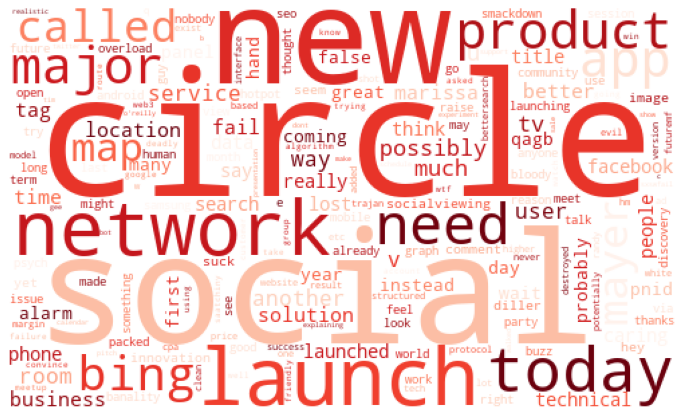

In [48]:
# Visualize them
wordcloud_google_neg = generate_wordcloud(tokens_google_neg_nostopwords_lemm, colormap='Reds')

## Look at this word cloud, Social, circle, launch, bing, network also occur in the negative tweets. Marissa Mayer, product, map, follow by suck, lost, deadly, negative words. 

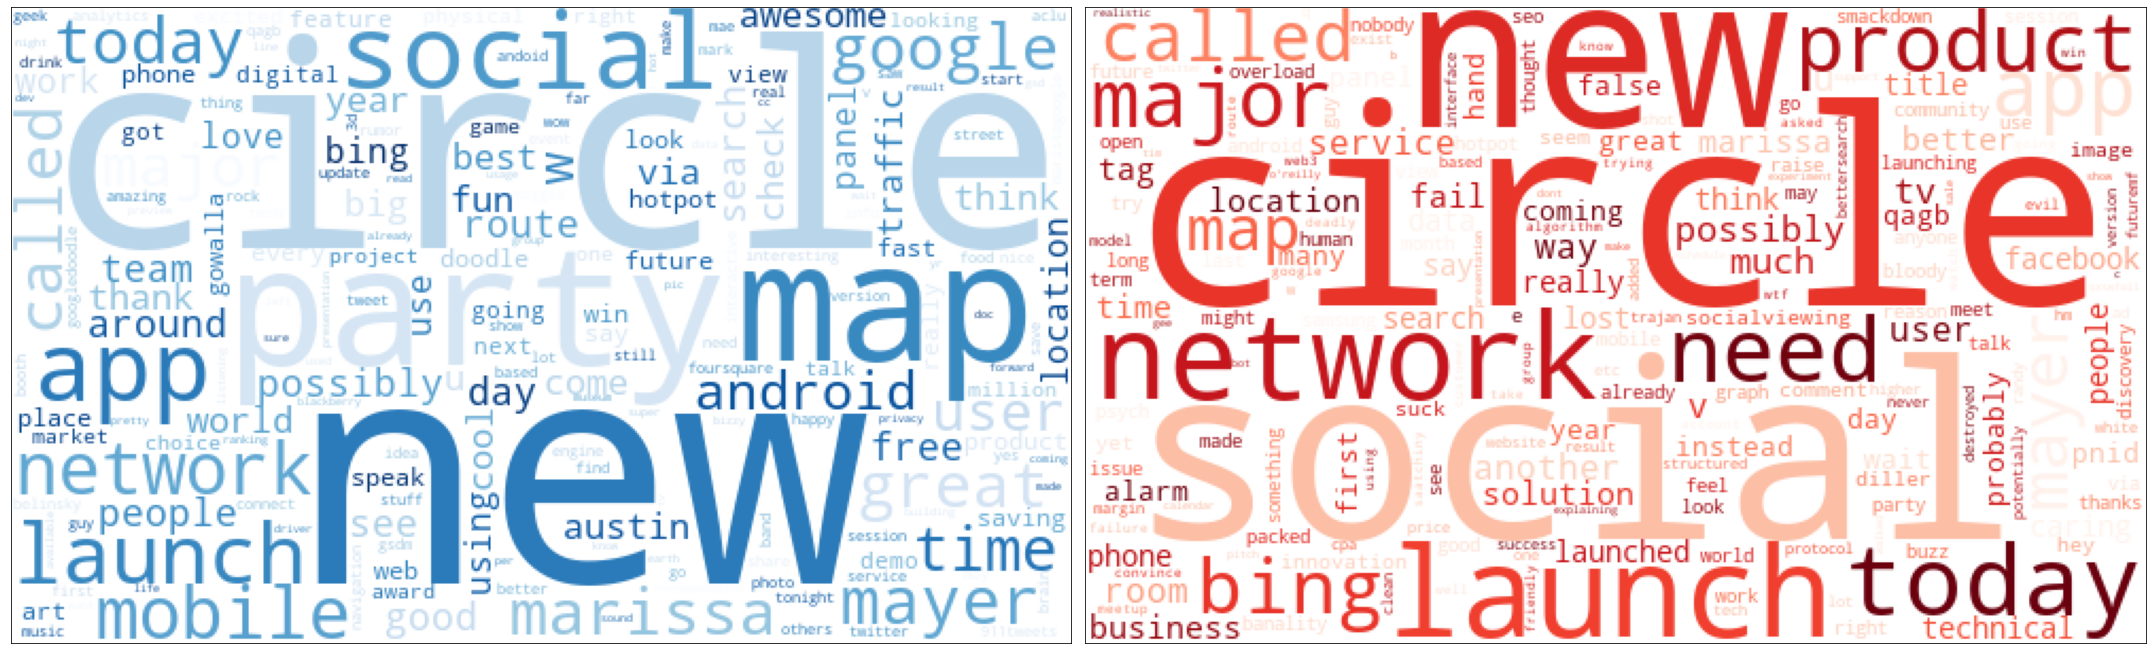

In [49]:
# Compare positive and negative tweets on Google products
compare_wordclouds(wordcloud_google_pos, wordcloud_google_neg)

### Looking at Google positive and negative tweets: circle pops out for both cases, social too. Words like false, alarm, wait, fail, lost occur in negative tweets more than occur in the positive tweets.
    

# Now, let's look into Apple products since we decided to focus on Apple products, and iPad shows up a lot in both the positive and negative tweets.

In [50]:
# Look into brand/product categories
df['Brand/Product'].value_counts()

google                             1691
apple                              1167
ipad                               1035
iPad                                942
Unknown                             755
iphone                              684
Apple                               659
iPad or iPhone App                  470
Google                              429
android                             322
iPhone                              296
Other Google product or service     292
Android App                          81
Android                              78
Other Apple product or service       35
Name: Brand/Product, dtype: int64

In [51]:
# filtering the dataset by only looking into ipad, iPad, iPad or iPhone App
df_iPad = df [ (df['Brand/Product'] == 'ipad') | (df['Brand/Product'] == 'iPad') | (df['Brand/Product'] == 'iPad or iPhone App')]
df_iPad

Unnamed: 0                                              Tweet  \
1              1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2              2  @swonderlin Can not wait for #iPad 2 also. The...   
3              3  @sxsw I hope this year's festival isn't as cra...   
5              5  @teachntech00 New iPad Apps For #SpeechTherapy...   
7              8  Beautifully smart and simple idea RT @madebyma...   
...          ...                                                ...   
8918        9075  At &quot;Your Mom Has an iPad&quot; session #y...   
8919        9076  At &quot;Your Mom Has an iPad&quot; session at...   
8922        9079  &quot;papyrus...sort of like the ipad&quot; - ...   
8928        9085  I've always used Camera+ for my iPhone b/c it ...   
8931        9088                      Ipad everywhere. #SXSW {link}   

           Brand/Product   Emotion  Brand  
1     iPad or iPhone App  Positive  Apple  
2                   iPad  Positive  Apple  
3     iPad or iPhone App  Negative  Apple  
5                   ipad   Neutral  Apple  
7     iPad or iPhone App  Positive  Apple  
...                  ...       ...    ...  
8918                ipad   Neutral  Apple  
8919                ipad   Neutral  Apple  
8922                iPad  Positive  Apple  
8928  iPad or iPhone App  Positive  Apple  
8931                iPad  Positive  Apple  

[2447 rows x 5 columns]

In [52]:
# Focus on the positive tweets on iPad
df_iPad_positive = df_iPad[ df_iPad['Emotion'] == 'Positive' ]

In [53]:
#parsing tweets into a list
corpus_iPad_positive = df_iPad_positive['Tweet'].to_list()

In [54]:
#Tokenize
tokens_ipad_pos = tokenize_tweets(corpus_iPad_positive)
#Remove stop words and punctuations
tokens_ipad_pos_nostopwords = remove_stopwords(tokens_ipad_pos, stop_lst_no_brands_products)
#Lemmitizing 
tokens_ipad_pos_nostopwords_lemm = lemmatization(tokens_ipad_pos_nostopwords)

In [56]:
# check out the top 60 most common words
freq = FreqDist(tokens_ipad_pos_nostopwords_lemm )
freq.most_common(60)

[('2', 458),
 ('app', 286),
 ('store', 206),
 ('new', 167),
 ('', 163),
 ('austin', 101),
 ('get', 90),
 ('line', 71),
 ('#ipad2', 69),
 ('one', 69),
 ("i'm", 65),
 ('apps', 59),
 ('time', 58),
 ('free', 56),
 ('awesome', 53),
 ('win', 53),
 ('day', 50),
 ('like', 49),
 ('video', 47),
 ('via', 46),
 ('great', 46),
 ('want', 46),
 ('first', 45),
 ('pop-up', 45),
 ('check', 45),
 ('need', 41),
 ('got', 40),
 ('go', 40),
 ('today', 38),
 ('good', 36),
 ('going', 35),
 ('design', 33),
 ('launch', 33),
 ('people', 32),
 ('w', 32),
 ('cool', 32),
 ('really', 29),
 ('look', 29),
 ('take', 29),
 ('game', 28),
 ('come', 28),
 ('buy', 27),
 ('u', 27),
 (':)', 27),
 ('also', 26),
 ('make', 26),
 ('coming', 26),
 ('popup', 26),
 ('live', 26),
 ('download', 26),
 ('see', 26),
 ('nice', 25),
 ('thanks', 25),
 ('next', 25),
 ('year', 25),
 ('session', 25),
 ('case', 25),
 ('party', 24),
 ('around', 24),
 ('know', 23)]

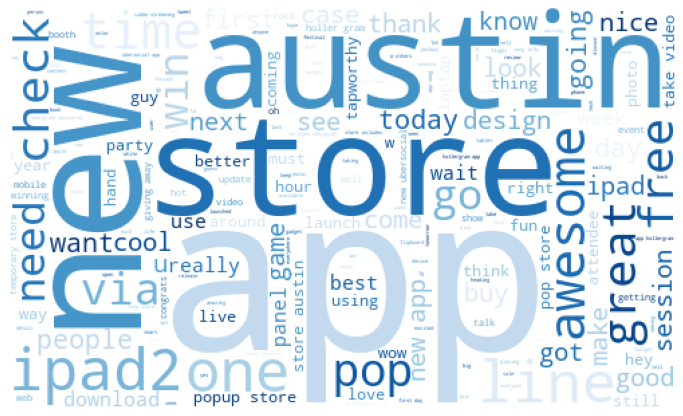

In [59]:
# Visualize them with WordCloud
wordcloud_ipad_pos = generate_wordcloud(tokens_ipad_pos_nostopwords_lemm, colormap='Blues', collocations = True)

### For positive sentiment tweets for iPad 2, it looks like people enjoy their free products, excited about a new store pops up in Austin when iPad 2 launched.

## Look at what's in the negative tweets about iPad

In [61]:
# Create its own dataframe
df_iPad_negative = df_iPad[ df_iPad['Emotion'] == 'Negative' ]
df_iPad_negative

Unnamed: 0                                              Tweet  \
3              3  @sxsw I hope this year's festival isn't as cra...   
66            67  attending @mention iPad design headaches #sxsw...   
167          170  Seriously #sxsw? Did you do any testing on the...   
169          172  ipad2 and #sxsw...a conflagration of doofusnes...   
177          180  You spent $1,000+ to come to SXSW. \n\nYou've ...   
...          ...                                                ...   
8612        8762  You'll have to wait 4-5 weeks for an iPad 2, b...   
8672        8822  Dear #sxsw iPhone app: you suck again this yea...   
8778        8930  #iPad #news #apps not popular with the #kids. ...   
8791        8943  Hmmm...Taxi Magic on iPhone does not appear to...   
8829        8981  I think my effing hubby is in line for an #iPa...   

           Brand/Product   Emotion  Brand  
3     iPad or iPhone App  Negative  Apple  
66                  iPad  Negative  Apple  
167   iPad or iPhone App  Negative  Apple  
169                 iPad  Negative  Apple  
177                 iPad  Negative  Apple  
...                  ...       ...    ...  
8612                iPad  Negative  Apple  
8672  iPad or iPhone App  Negative  Apple  
8778  iPad or iPhone App  Negative  Apple  
8791  iPad or iPhone App  Negative  Apple  
8829                iPad  Negative  Apple  

[199 rows x 5 columns]

In [62]:
#parsing tweets into a list
corpus_iPad_negative = df_iPad_negative['Tweet'].to_list()

In [63]:
#Tokenize
tokens_ipad_neg = tokenize_tweets(corpus_iPad_negative)
#Remove stop words and punctuations
tokens_ipad_neg_nostopwords = remove_stopwords(tokens_ipad_neg, stop_lst_no_brands_products)
#Lemmitizing 
tokens_ipad_neg_nostopwords_lemm = lemmatization(tokens_ipad_neg_nostopwords)

In [64]:
# Check out the top 60 most common words
freq = FreqDist(tokens_ipad_neg_nostopwords_lemm )
freq.most_common(60)

[('2', 67),
 ('app', 38),
 ('design', 27),
 ('apps', 20),
 ('', 20),
 ('new', 18),
 ('headache', 17),
 ('like', 17),
 ('need', 14),
 ('news', 13),
 ("i've", 12),
 ('#tapworthy', 12),
 ('people', 11),
 ('fast', 11),
 ('thing', 11),
 ('money', 11),
 ('get', 11),
 ('look', 11),
 ('fade', 10),
 ('take', 10),
 ('button', 10),
 ('gave', 9),
 ('#japan', 9),
 ('one', 9),
 ('via', 9),
 ('novelty', 9),
 ('among', 9),
 ('delegate', 9),
 ('see', 9),
 ('best', 8),
 ('heard', 8),
 ('relief', 8),
 ('think', 8),
 ('day', 8),
 ('digital', 8),
 ('hate', 8),
 ("i'm", 7),
 ('content', 7),
 ('really', 7),
 ('time', 7),
 ('call', 7),
 ('line', 7),
 ('every', 7),
 ('wait', 6),
 ('#ipad2', 6),
 ('say', 6),
 ('year', 6),
 ('weekend', 6),
 ('tablet', 6),
 ('photo', 6),
 ('session', 6),
 ('someone', 6),
 ('1', 5),
 ('still', 5),
 ('tweet', 5),
 ('would', 5),
 ('use', 5),
 ('first', 5),
 ('twitter', 5),
 ('going', 5)]

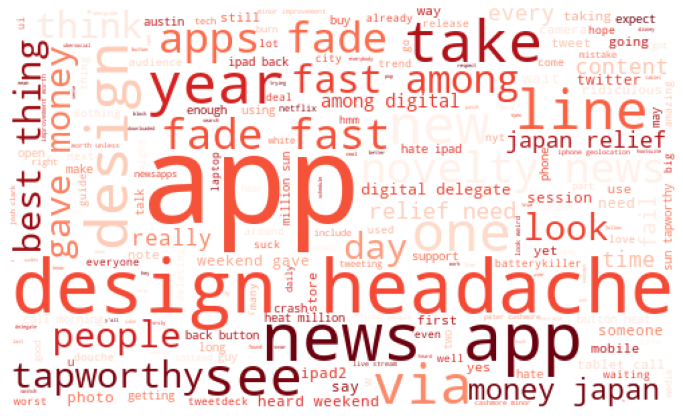

In [67]:
# Visualize iPad negative tweets
wordcloud_ipad_neg = generate_wordcloud(tokens_ipad_neg_nostopwords_lemm, colormap='Reds', collocations = True)

### Negative tweets on iPad seems focus on the design.

## move on to iPhone tweets analysis:

In [68]:
# Create its own dataframe
df_iPhone = df [ (df['Brand/Product'] == 'iPhone') | (df['Brand/Product'] == 'iphone') ]
df_iPhone

Unnamed: 0                                              Tweet  \
0              0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
16            17  I just noticed DST is coming this weekend. How...   
41            42  Hey #SXSW - How long do you think it takes us ...   
43            44  For I-Pad ?RT @mention New #UberSocial for #iP...   
45            46  Hand-Held Û÷HoboÛª: Drafthouse launches Û÷H...   
...          ...                                                ...   
8890        9045  @mention you are my favorite-- thanks for comi...   
8915        9072  @mention your iPhone 4 cases are Rad and Ready...   
8916        9073  At #SXSW your iphone charger is your best friend.   
8920        9077  @mention your PR guy just convinced me to swit...   
8934        9091  Some Verizon iPhone customers complained their...   

     Brand/Product   Emotion  Brand  
0           iPhone  Negative  Apple  
16          iPhone  Negative  Apple  
41          iphone   Neutral  Apple  
43          iphone   Neutral  Apple  
45          iphone  Positive  Apple  
...            ...       ...    ...  
8890        iPhone  Positive  Apple  
8915        iPhone  Positive  Apple  
8916        iphone   Neutral  Apple  
8920        iPhone  Positive  Apple  
8934        iphone   Neutral  Apple  

[980 rows x 5 columns]

In [69]:
# Create a dataframe for iPhone positive tweets
df_iPhone_positive = df_iPhone[ df_iPhone['Emotion'] == 'Positive' ]

In [70]:
df_iPhone_positive.head()

Unnamed: 0                                              Tweet  \
45           46  Hand-Held Û÷HoboÛª: Drafthouse launches Û÷H...   
75           76  I love my @mention iPhone case from #Sxsw but ...   
94           96  Yai!!! RT @mention New #UberSocial for #iPhone...   
132         135  Take that #SXSW ! RT @mention Major South Kore...   
154         157  @mention  #SXSW LonelyPlanet Austin guide for ...   

    Brand/Product   Emotion  Brand  
45         iphone  Positive  Apple  
75         iPhone  Positive  Apple  
94         iPhone  Positive  Apple  
132        iPhone  Positive  Apple  
154        iphone  Positive  Apple

In [71]:
corpus_iPhone_positive = df_iPhone_positive['Tweet'].to_list()

In [72]:
#Tokenize
tokens_iPhone_pos = tokenize_tweets(corpus_iPhone_positive)
#Remove stop words and punctuations
tokens_iPhone_pos_nostopwords = remove_stopwords(tokens_iPhone_pos, stop_lst_no_brands_products)
#Lemmitizing 
tokens_iPhone_pos_nostopwords_lemm = lemmatization(tokens_iPhone_pos_nostopwords)

In [74]:
freq = FreqDist(tokens_iPhone_pos_nostopwords_lemm )
freq.most_common(60)

[('', 49),
 ('new', 25),
 ('app', 19),
 ('w', 18),
 ('case', 17),
 ('got', 17),
 ('4', 16),
 ('free', 15),
 ("i'm", 15),
 ('get', 13),
 ('make', 13),
 ('austin', 13),
 ('phone', 12),
 ('next', 12),
 ('love', 11),
 ('charger', 11),
 ('one', 11),
 ('store', 10),
 ('time', 10),
 ('year', 9),
 ('like', 9),
 ('u', 9),
 ('#zazzlesxsw', 9),
 ('give', 8),
 ('battery', 8),
 ('thanks', 8),
 ('juice', 8),
 ('tell', 8),
 ('use', 8),
 ('come', 8),
 ('#ubersocial', 7),
 ('includes', 7),
 ('uberguide', 7),
 ('last', 7),
 ('best', 7),
 ('charging', 7),
 ('thing', 7),
 ('platform', 7),
 ('via', 7),
 ('much', 7),
 ('ready', 7),
 ('awesome', 7),
 ('even', 7),
 ('guide', 6),
 ('need', 6),
 ('wow', 6),
 ('cool', 6),
 ("i'll", 6),
 ('today', 6),
 ('game', 6),
 ('charge', 6),
 ('bar', 6),
 ('going', 6),
 ("that's", 6),
 ('someone', 6),
 ('2', 6),
 ('day', 6),
 ('1', 5),
 ('laptop', 5),
 ('using', 5)]

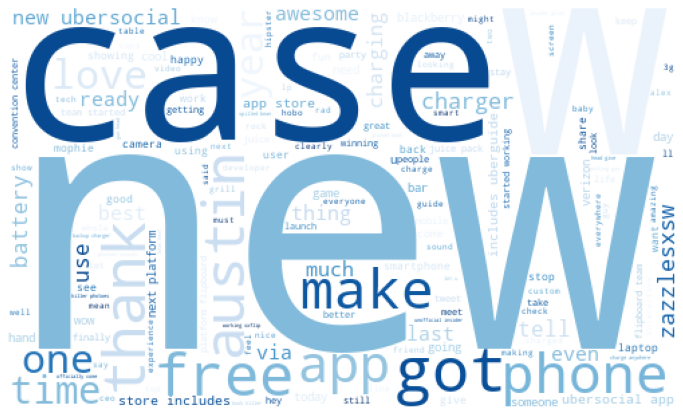

In [73]:
# Visualize with wordcloud
wordcloud_iPhone_pos = generate_wordcloud(tokens_iPhone_pos_nostopwords_lemm, colormap='Blues', collocations = True)

### Positive tweets on iPhone include case, giving free products to the people..

## Analyze iPhone negative tweets

In [74]:
# Create a dataframe for negative tweets for iPhone
df_iPhone_negative = df_iPhone[ df_iPhone['Emotion'] == 'Negative' ]

In [75]:
corpus_iPhone_negative = df_iPhone_negative['Tweet'].to_list()

In [76]:
#Tokenize
tokens_iPhone_neg = tokenize_tweets(corpus_iPhone_negative)
#Remove stop words and punctuations
tokens_iPhone_neg_nostopwords = remove_stopwords(tokens_iPhone_neg, stop_lst_no_brands_products)
#Lemmitizing 
tokens_iPhone_neg_nostopwords_lemm = lemmatization(tokens_iPhone_neg_nostopwords)

In [77]:
freq = FreqDist(tokens_iPhone_neg_nostopwords_lemm )
freq.most_common(60)

[('battery', 15),
 ('app', 11),
 ('austin', 9),
 ('time', 9),
 ('phone', 8),
 ('go', 8),
 ('know', 7),
 ('blackberry', 7),
 ('user', 6),
 ('going', 6),
 ('already', 6),
 ('like', 6),
 ('one', 6),
 ('many', 5),
 ('hour', 5),
 ('people', 5),
 ('think', 5),
 ('would', 5),
 ('u', 5),
 ('life', 5),
 ('good', 5),
 ('3g', 4),
 ('need', 4),
 ("i'm", 4),
 ('panel', 4),
 ('say', 4),
 ('4', 4),
 ('t-mobile', 4),
 ('store', 4),
 ('shit', 4),
 ('last', 4),
 ('long', 4),
 ('made', 4),
 ('technology', 4),
 ('always', 4),
 ('working', 4),
 ('new', 4),
 ('get', 4),
 ('anything', 4),
 ('forward', 4),
 ('tweeting', 3),
 ('dead', 3),
 ('late', 3),
 ('come', 3),
 ('alarm', 3),
 ('flight', 3),
 ('also', 3),
 ('stupid', 3),
 ('back', 3),
 ('even', 3),
 ("can't", 3),
 ('tweet', 3),
 ('getting', 3),
 ('brick', 3),
 ('else', 3),
 ('ever', 3),
 ('never', 3),
 ('could', 3),
 ('much', 3),
 ("iphone's", 3)]

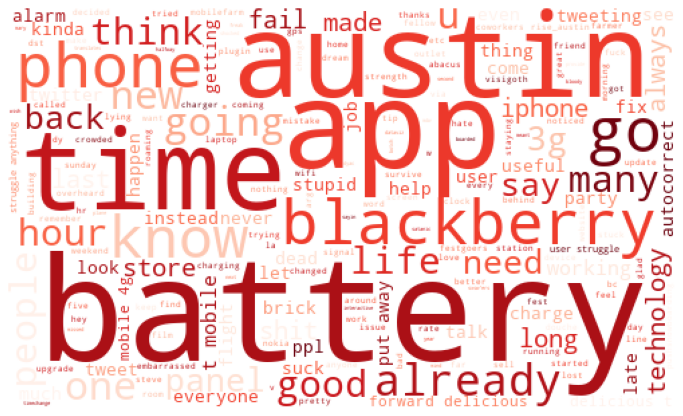

In [79]:
# Visualize iPhone negative tweets most frequent words
wordcloud_iPhone_neg = generate_wordcloud(tokens_iPhone_neg_nostopwords_lemm, colormap='Reds', collocations = True)

### From all negative tweets about iPhone, it looks like battery is the biggest issue, as the top 1 most frequent word. People also brought up blackberry, they probably compared iPhone with Blackberry.